In [1]:
# From https://github.com/SushmithaPulagam/TimeSeries_Auto-ARIMA
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
# Importing auto_arima 
from pmdarima.arima import auto_arima
#Read the sales dataset
sales_data = pd.read_csv("/home/rapunzel/home/projects/earth_surface_temperature/data/ChampagneSales.csv")

In [2]:
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
#Convert the month column to datetime
sales_data['Month']=pd.to_datetime(sales_data['Month'])
#Set the index of the Month 
sales_data.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

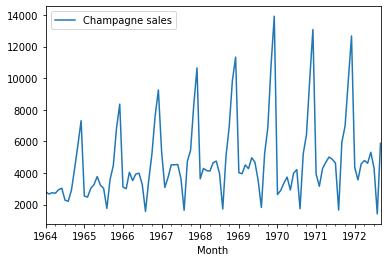

In [4]:
# To understand the pattern
sales_data.plot()

In [5]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

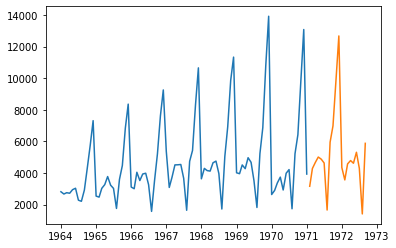

In [6]:
#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]
plt.plot(train)
plt.plot(test)

In [18]:
arima_model =  auto_arima(train,
                            start_p=0, 
                            d=1, 
                            start_q=0, 
                            max_p=5, 
                            max_d=5, 
                            max_q=5, 
                            start_P=0, 
                            D=1, 
                            start_Q=0, 
                            max_P=5, 
                            max_D=5,
                            max_Q=5, 
                            m=5, 
                            seasonal=True, 
                            error_action='warn',
                            trace = True,
                            supress_warnings=True,
                            stepwise = True,
                            random_state=20,
                            n_fits = 50 )

#Summary of the model
arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=1507.978, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=1506.420, Time=0.62 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.87 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=1509.960, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=1497.965, Time=1.10 sec
 ARIMA(1,1,0)(3,1,0)[5]             : AIC=1499.763, Time=1.87 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=2.92 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=1.00 sec
 ARIMA(1,1,0)(3,1,1)[5]             : AIC=inf, Time=3.79 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=1496.695, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=1504.291, Time=0.14 sec
 ARIMA(0,1,0)(3,1,0)[5]             : AIC=1498.730, Time=0.51 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(3,1,1)[5]             : AIC=inf, Time=4.54 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   85
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 5)   Log Likelihood                -745.347
Date:                           Thu, 19 May 2022   AIC                           1496.695
Time:                                   15:10:09   BIC                           1503.803
Sample:                                        0   HQIC                          1499.543
                                            - 85                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.4050      0.087     -4.656      0.000      -0.575      -0.235
ar.S.L10      -0.3972      0.144     -2.752      0.006      -0.680      -0.114
sigma2      9.867e+06   1.27e+06      7.786      0.000    7.38e+06    1.24e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                19.12
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               4.36   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction.head()

,predicted_sales
Month,
1971-02-01,2888.780343
1971-03-01,3360.398180
1971-04-01,3687.864050
1971-05-01,3010.133805
1971-06-01,3947.848648


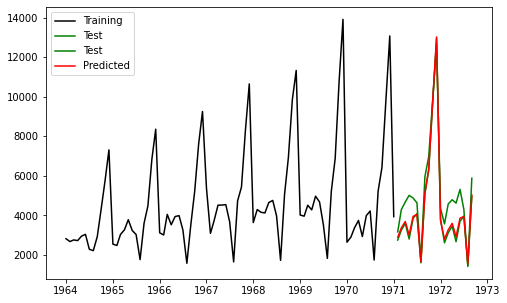

In [19]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training", color="black")
plt.plot(test,label="Test", color="green")
plt.plot(prediction,label="Predicted", color="red")
plt.legend(loc = 'upper left')
plt.show()

In [14]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114969330335862